In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import time 
import pandas as pd 
import seaborn as sns
import random
sns.set()
import importlib
from grid_world import grid_world

In [2]:
myGridWorld = grid_world(False)

Grid world initialized!


# visualize epsilon-decay for when max_steps = 1000 


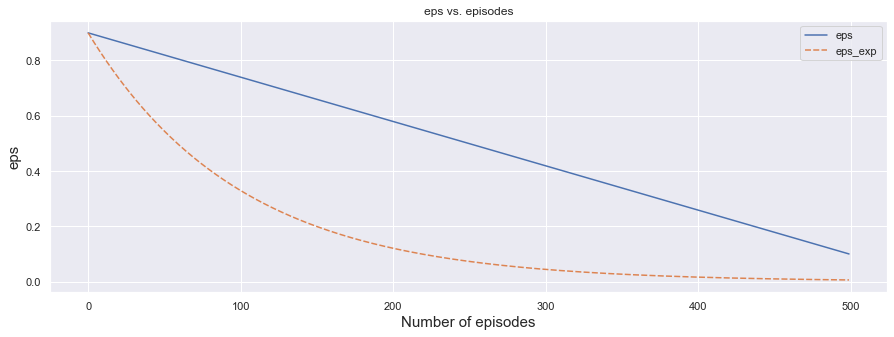

In [3]:
eps_start = 0.9#icy_args.pop('eps_start')
eps_end = 0.1 #policy_args.pop('eps_end')  
max_steps = 500
eps = np.linspace(eps_start, eps_end, max_steps)
steps = np.arange(0,max_steps,1)

df = pd.DataFrame(eps, columns = ['eps'])
"""add exp """
#eps_start = 0.9 
eps_exp = [] 
eps_exp.append(eps_start)
for i in range(1, max_steps):
    eps_exp.append(eps_exp[i-1]*0.99)
    
df['eps_exp'] = eps_exp


myGridWorld.plot_graph(df, "eps vs. episodes", "Number of episodes", "eps")

# Evaluate epsilon-greedy  


start with alpha (learning rate) = 0.5 
start with gamma = 0.5

note in doc: 
<br> do not evaluate eps = 0 - fully exploratory, poor performance
<br> do not evaluate eps = 1 - exploitation, goes back to collect the same reward over and over again, doesn't reach terminal state

In [9]:
eps_starts = np.arange(0.1, 1.0, 0.1)
alphas = np.arange(0, 1.1, 0.1)
gammas =  np.arange(0, 1.1, 0.1)
num_eps = 600 
max_steps = 100 
policy = 'eps_greedy'

data_df = pd.DataFrame(columns = ["alpha", "gamma", "eps", "rewards_mean", "rewards_std", "steps_mean", "steps_std", "terminal_state_count"])

In [10]:
for alpha in alphas:
    for gamma in gammas:
        for eps in eps_starts:
             rewards_per_episode, steps_per_episode, found_flag, Q = myGridWorld.run_q_learning(num_eps, max_steps, alpha,
                                                                           gamma, policy, 
                                                                           {'eps_start' : eps , 'eps_end' : eps_end})
             rewards_df = pd.DataFrame(rewards_per_episode, columns = ['rewards'])#.describe()
             steps_df = pd.DataFrame(steps_per_episode, columns = ['steps'])#.describe()[]
             data_df = data_df.append({"alpha": alpha,
                         "gamma" : gamma,
                         "eps": eps, 
                         "rewards_mean": rewards_df.describe().loc['mean'][0],
                         "rewards_std" : rewards_df.describe().loc['std'][0],
                         "steps_mean": steps_df.describe().loc['mean'][0],
                         "steps_std": steps_df.describe().loc['std'][0], 
                         "terminal_state_count": found_flag}, ignore_index = True)
                
            


eps_greedy
time elapsed for 600 episodes : 3.32171630859375 s
eps_greedy
time elapsed for 600 episodes : 3.3963639736175537 s
eps_greedy
time elapsed for 600 episodes : 3.123565196990967 s
eps_greedy
time elapsed for 600 episodes : 3.1545746326446533 s
eps_greedy
time elapsed for 600 episodes : 3.0530648231506348 s
eps_greedy
time elapsed for 600 episodes : 3.8135063648223877 s
eps_greedy
time elapsed for 600 episodes : 3.341366767883301 s
eps_greedy
time elapsed for 600 episodes : 3.137857675552368 s
eps_greedy
time elapsed for 600 episodes : 3.127498149871826 s
eps_greedy
time elapsed for 600 episodes : 3.1285853385925293 s
eps_greedy
time elapsed for 600 episodes : 3.9375321865081787 s
eps_greedy
time elapsed for 600 episodes : 3.1948869228363037 s
eps_greedy
time elapsed for 600 episodes : 3.205078601837158 s
eps_greedy
time elapsed for 600 episodes : 3.065326690673828 s
eps_greedy
time elapsed for 600 episodes : 3.090928554534912 s
eps_greedy
time elapsed for 600 episodes : 3.6515

KeyboardInterrupt: 

In [11]:
data_df

,alpha,gamma,eps,rewards_mean,rewards_std,steps_mean,steps_std,terminal_state_count
0,0.0,0.0,0.1,51.900000,834.638568,74.566667,29.902606,304.0
1,0.0,0.0,0.2,98.915000,825.645587,72.803333,30.302669,323.0
2,0.0,0.0,0.3,116.800000,835.180768,72.585000,30.466645,320.0
3,0.0,0.0,0.4,82.023333,818.503708,74.171667,29.994360,319.0
4,0.0,0.0,0.5,83.798333,841.173221,73.155000,30.035888,319.0
...,...,...,...,...,...,...,...,...
108,0.1,0.1,0.1,2242.040000,157.947536,99.000000,0.000000,0.0
109,0.1,0.1,0.2,2124.900000,215.134093,98.388333,5.977213,9.0
110,0.1,0.1,0.3,1978.885000,303.736407,97.541667,9.535012,15.0
111,0.1,0.1,0.4,1723.971667,290.321095,97.963333,7.966457,11.0


In [5]:
eps_starts = np.arange(0.1, 1.1, 0.1)
alpha = 0.9 
policy = "eps_greedy_decay"
eps_end = 0.1
gamma = 0.8
max_steps = 500

num_eps = 600 
df_rewards = pd.DataFrame(columns = eps_starts)
df_steps = pd.DataFrame(columns = eps_starts)
df_ts = pd.DataFrame(columns = eps_starts)


for eps in eps_starts: 
    print("eps: ", eps)

    rewards_per_episode, steps_per_episode, found_flag, Q = myGridWorld.run_q_learning(num_eps, max_steps, alpha,
                                                                           gamma, policy, 
                                                                           {'eps_start' : eps , 'eps_end' : eps_end})
    df_rewards[eps] = rewards_per_episode 
    df_steps[eps] =steps_per_episode
    df_ts[eps] = [found_flag]


eps:  0.0
eps_greedy_decay
time elapsed for 600 episodes : 23.32132863998413 s
Path:  [6, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 7, 13, 

In [13]:
df_steps.describe()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,600.0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,499.0,57.671667,17.031667,22.645000,61.596667,35.003333,23.158333,22.865000,37.681667,36.11000,36.655000
std,0.0,143.461164,52.610269,68.392823,143.528632,92.954312,45.211430,21.364476,75.060979,51.90705,15.172992
min,499.0,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,9.000000
25%,499.0,9.000000,9.000000,11.000000,11.000000,12.000000,13.000000,16.000000,17.000000,21.00000,25.000000
50%,499.0,9.000000,11.000000,12.000000,14.000000,15.000000,17.000000,21.000000,24.000000,29.00000,35.000000
75%,499.0,13.000000,13.000000,15.000000,19.000000,21.000000,23.000000,27.000000,33.000000,37.25000,46.000000
max,499.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,89.000000


In [ ]:
#s

In [11]:
#start by setting epsilon = 0.5 decay for equal chance of exploration and exploitation - find optimal alpha
alpha = np.arange(0.1, 1.1, 0.1)
policy = "eps_greedy_decay"
eps_start = 0.5
eps_end = 0.1
gamma = 0.8
max_steps = 1000

num_eps = 600 
df_rewards = pd.DataFrame(columns = alpha)
df_steps = pd.DataFrame(columns = alpha)
df_ts = pd.DataFrame(columns = alpha)


for a in alpha: 
    print("alpha: ", a)

    rewards_per_episode, steps_per_episode, found_flag, Q = myGridWorld.run_q_learning(num_eps, max_steps, a,
                                                                           gamma, policy, 
                                                                           {'eps_start' : eps_start , 'eps_end' : eps_end})
    df_rewards[a] = rewards_per_episode 
    df_steps[a] =steps_per_episode
    df_ts[a] = [found_flag]



alpha:  0.1
eps_greedy_decay
time elapsed for 600 episodes : 2.135206937789917 s
Path:  [1, 7, 5, 11, 10, 4, 10, 16, 22, 23, 29, 28, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, -1.0, -1.0, -1.0, 93.0, -1.0, -1.0, -1.0, -1.0, -1.0, 987.0]
alpha:  0.2
eps_greedy_decay
time elapsed for 600 episodes : 1.7818069458007812 s
Path:  [6, 30, 24, 30, 24, 30, 24, 25, 19, 20, 14, 15, 21, 22, 28, 29, 35]
Rewards:  [-1.0, -100.0, -1.0, -100.0, -1.0, -100.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 984.0]
alpha:  0.30000000000000004
eps_greedy_decay
time elapsed for 600 episodes : 1.1489951610565186 s
Path:  [6, 7, 5, 11, 5, 11, 17, 16, 22, 23, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, 96.0, -1.0, -1.0, 93.0, -1.0, -1.0, -1.0, 989.0]
alpha:  0.4
eps_greedy_decay
time elapsed for 600 episodes : 1.002347707748413 s
Path:  [6, 7, 5, 11, 10, 4, 10, 4, 10, 11, 10, 16, 17, 11, 10, 16, 10, 16, 22, 28, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 89.

In [12]:
df_rewards.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1278.913333,1200.795000,1179.271667,1207.506667,1163.271667,1147.421667,1160.226667,1156.331667,1147.585000,1150.410000
std,333.914991,260.212491,256.148338,221.746686,264.652412,198.432506,219.961854,208.477104,240.776941,218.563275
min,531.000000,58.000000,114.000000,550.000000,-951.000000,426.000000,-456.000000,390.000000,-1729.000000,413.000000
25%,1144.750000,1074.750000,1059.000000,1085.500000,1053.000000,1057.000000,1058.000000,1057.500000,1047.750000,1040.000000
50%,1229.500000,1177.000000,1173.000000,1173.000000,1169.000000,1165.000000,1171.000000,1165.000000,1169.000000,1163.000000
75%,1351.500000,1335.250000,1267.000000,1311.250000,1262.000000,1257.250000,1267.000000,1267.000000,1261.000000,1264.000000
max,2934.000000,2492.000000,2871.000000,2665.000000,2547.000000,2008.000000,2389.000000,2199.000000,2465.000000,2392.000000


In [15]:
df_steps.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,28.738333,28.305000,25.380000,20.590000,21.850000,17.806667,18.208333,20.403333,21.371667,18.995000
std,45.608187,75.048623,75.684317,24.470184,39.063291,13.544435,14.807894,44.304049,54.285065,14.970142
min,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
25%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000,13.000000,13.000000
50%,17.000000,17.000000,17.000000,17.000000,15.000000,16.000000,15.000000,15.000000,16.000000,17.000000
75%,25.000000,25.000000,21.000000,21.250000,21.000000,21.000000,21.000000,21.000000,22.000000,21.000000
max,447.000000,999.000000,999.000000,479.000000,535.000000,305.000000,292.000000,999.000000,999.000000,279.000000


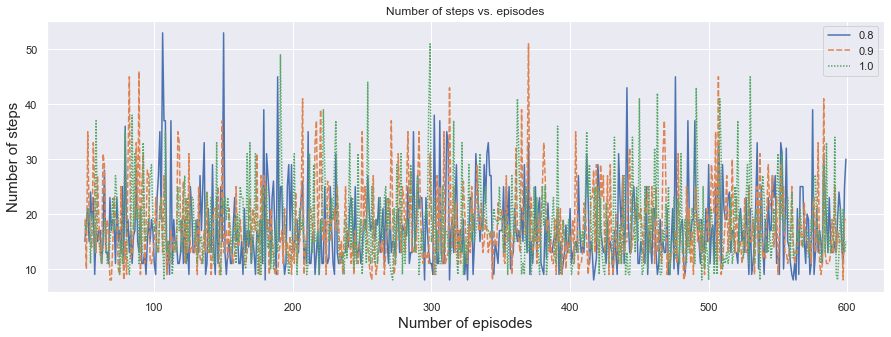

In [20]:
myGridWorld.plot_graph(df_steps.iloc[50:, 7:], "Number of steps vs. episodes", "Number of episodes", "Number of steps") #.iloc[:, 6:]

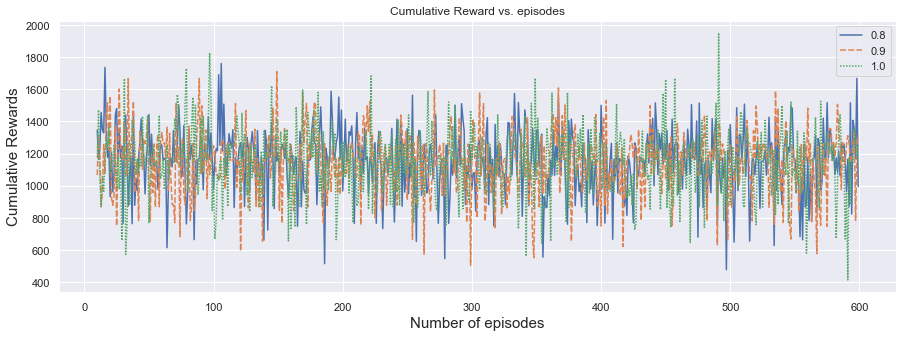

In [22]:
myGridWorld.plot_graph(df_rewards.iloc[10:, 7:], "Cumulative Reward vs. episodes", "Number of episodes", "Cumulative Rewards")

set alpha = 1, gamma = 0.8 

In [25]:
eps_starts = np.arange(0, 1.1, 0.1)
eps_starts

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [34]:
eps_starts = np.arange(0, 1.1, 0.1)
alpha = 1
policy = "eps_greedy_decay"
eps_end = 0.1
gamma = 0.8
max_steps = 1000

num_eps = 600 
df_rewards = pd.DataFrame(columns = eps_starts)
df_steps = pd.DataFrame(columns = eps_starts)
df_ts = pd.DataFrame(columns = eps_starts)


for eps in eps_starts: 
    print("eps: ", eps)

    rewards_per_episode, steps_per_episode, found_flag, Q = myGridWorld.run_q_learning(num_eps, max_steps, alpha,
                                                                           gamma, policy, 
                                                                           {'eps_start' : eps , 'eps_end' : eps_end})
    df_rewards[eps] = rewards_per_episode 
    df_steps[eps] =steps_per_episode
    df_ts[eps] = [found_flag]


eps:  0.0
eps_greedy_decay
time elapsed for 600 episodes : 4.032996416091919 s
Path:  [6, 7, 5, 11, 17, 16, 22, 28, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, -1.0, 95.0, -1.0, -1.0, -1.0, 991.0]
eps:  0.1
eps_greedy_decay
time elapsed for 600 episodes : 0.7568840980529785 s
Path:  [6, 7, 13, 14, 15, 16, 22, 23, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, -1.0, 95.0, -1.0, -1.0, -1.0, 991.0]
eps:  0.2
eps_greedy_decay
time elapsed for 600 episodes : 0.6328549385070801 s
Path:  [6, 7, 13, 14, 8, 14, 15, 16, 22, 23, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, -100.0, -1.0, -1.0, 93.0, -1.0, -1.0, -1.0, 989.0]
eps:  0.30000000000000004
eps_greedy_decay
time elapsed for 600 episodes : 0.791522741317749 s
Path:  [6, 7, 13, 7, 5, 11, 10, 16, 17, 16, 10, 16, 10, 16, 17, 16, 22, 23, 29, 35]
Rewards:  [-1.0, -1.0, 98.0, -1.0, 96.0, -1.0, -1.0, 93.0, -1.0, 91.0, -1.0, 89.0, -1.0, 87.0, -1.0, 85.0, -1.0, -1.0, -1.0, 981.0]
eps:  0.4
eps_greedy_decay
time elapsed for 600 episodes : 0.819340467453002

In [35]:
df_steps.describe()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,85.193333,16.253333,14.140000,14.656667,18.240000,19.501667,21.181667,29.018333,38.426667,55.935000,75.935000
std,259.136674,71.164972,38.797799,29.800205,42.628132,39.606031,12.160117,22.211038,24.551767,35.495643,48.484968
min,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,10.000000
25%,9.000000,9.000000,9.000000,9.000000,11.000000,12.750000,13.000000,17.000000,21.000000,29.000000,37.000000
50%,9.000000,9.000000,11.000000,11.000000,14.000000,15.000000,19.000000,25.000000,32.000000,48.000000,66.000000
75%,9.000000,11.000000,13.000000,15.000000,19.000000,21.000000,25.000000,35.250000,49.250000,71.250000,107.000000
max,999.000000,999.000000,700.000000,693.000000,999.000000,915.000000,206.000000,308.000000,183.000000,240.000000,317.000000


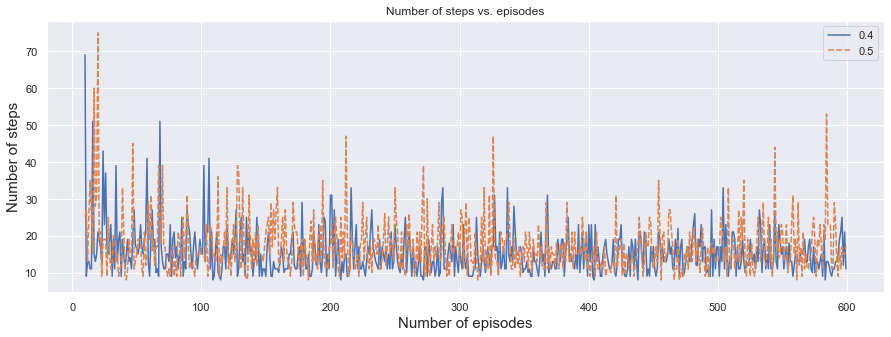

In [48]:
myGridWorld.plot_graph(df_steps.iloc[10:, 4:6], "Number of steps vs. episodes", "Number of episodes", "Number of steps") #.iloc[:, 6:]

In [31]:
df_rewards.describe()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,1213.765000,1203.725000,1198.403333,1213.331667,1149.841667,1136.721667,1112.771667,1103.16000,1027.863333,864.315000,524.551667
std,224.956749,220.679145,189.575928,164.319688,202.646645,223.650524,267.557704,302.79655,345.507284,454.294197,661.737679
min,390.000000,-769.000000,764.000000,215.000000,462.000000,318.000000,-465.000000,-462.00000,-1142.000000,-1185.000000,-2757.000000
25%,1177.000000,1173.000000,1171.000000,1167.000000,1062.750000,979.000000,963.750000,898.75000,801.250000,630.750000,195.000000
50%,1177.000000,1177.000000,1177.000000,1177.000000,1165.000000,1162.500000,1142.500000,1131.50000,1042.500000,892.000000,654.500000
75%,1177.000000,1177.000000,1259.000000,1264.000000,1253.500000,1264.250000,1263.000000,1300.25000,1239.250000,1171.250000,929.250000
max,3283.000000,3135.000000,3002.000000,2890.000000,2636.000000,1848.000000,1944.000000,2244.00000,2194.000000,1973.000000,1932.000000


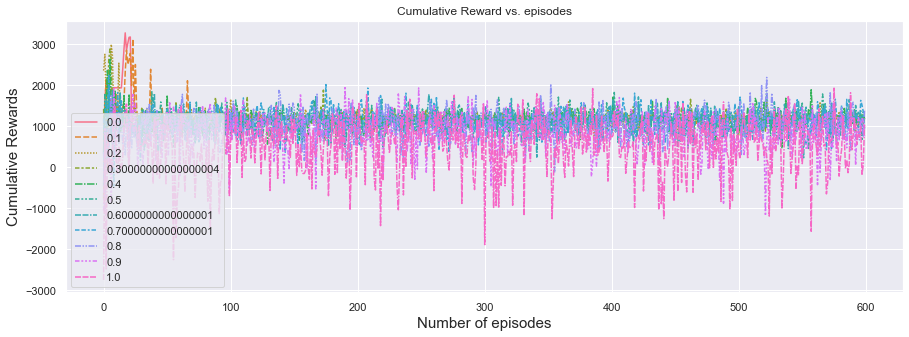

In [33]:
myGridWorld.plot_graph(df_rewards, "Cumulative Reward vs. episodes", "Number of episodes", "Cumulative Rewards")

In [7]:
print(Q[11, :])

[  0.         0.         0.         0.         0.       358.475776
   0.         0.         0.         0.       405.1184     0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.      ]


In [8]:
print(Q[29, :])

[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.         1742.5699902     0.
    0.            0.            0.         1742.5699902     0.
    0.            0.            0.            0.            0.
 2725.57810969]


In [ ]:
print(Q[29, :])